In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cleaned_Car_Details.csv')

df.replace('Unknown', np.nan, inplace=True)
df = df.dropna(subset=['fuel'])

features = ['year', 'mileage', 'engine', 'max_power', 'seats', 'transmission']
target = 'fuel'

In [ ]:
def extract_torque_value(torque):
    if pd.isna(torque):
        return np.nan
    try:
        num_str = ''.join(filter(lambda x: x.isdigit() or x == '.', str(torque).split()[0]))
        return float(num_str) if num_str else np.nan
    except:
        return np.nan

df['torque_value'] = df['torque'].apply(extract_torque_value)

if df['torque_value'].notna().sum() > len(df) / 2:
    features.append('torque_value')

df_clean = df.dropna(subset=features)

le = LabelEncoder()
df_clean.loc[:, 'transmission'] = le.fit_transform(df_clean['transmission'])

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report
    }

for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print("\nConfusion Matrix:")
    print(result['confusion_matrix'])
    print("\nClassification Report:")
    print(result['classification_report'])

plt.figure(figsize=(15, 5))


Decision Tree Results:
Accuracy: 0.99

Confusion Matrix:
[[  9   0   3   0]
 [  0 601   1   1]
 [  0   0   4   1]
 [  0   4   0 485]]

Classification Report:
              precision    recall  f1-score   support

         CNG       1.00      0.75      0.86        12
      Diesel       0.99      1.00      1.00       603
         LPG       0.50      0.80      0.62         5
      Petrol       1.00      0.99      0.99       489

    accuracy                           0.99      1109
   macro avg       0.87      0.88      0.87      1109
weighted avg       0.99      0.99      0.99      1109


Random Forest Results:
Accuracy: 0.99

Confusion Matrix:
[[ 10   0   2   0]
 [  0 602   0   1]
 [  0   0   4   1]
 [  0   3   0 486]]

Classification Report:
              precision    recall  f1-score   support

         CNG       1.00      0.83      0.91        12
      Diesel       1.00      1.00      1.00       603
         LPG       0.67      0.80      0.73         5
      Petrol       1.00      0

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

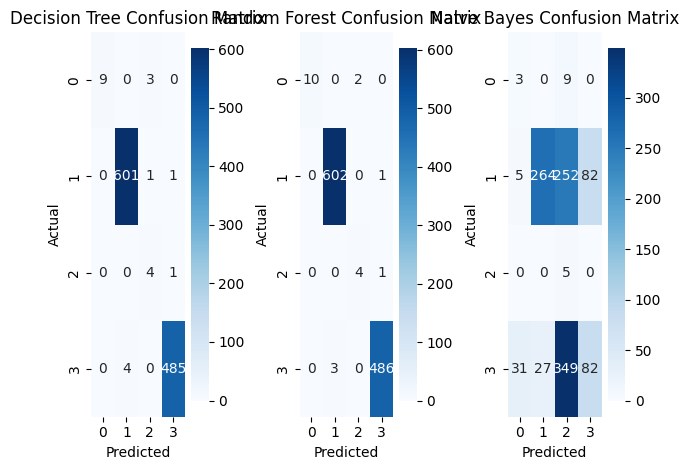


Best Model: Random Forest with accuracy: 0.99


In [ ]:
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]['accuracy']:.2f}")


        Feature  Importance
6  torque_value    0.412362
2        engine    0.292349
1       mileage    0.118976
3     max_power    0.099482
4         seats    0.048235
0          year    0.023918
5  transmission    0.004678


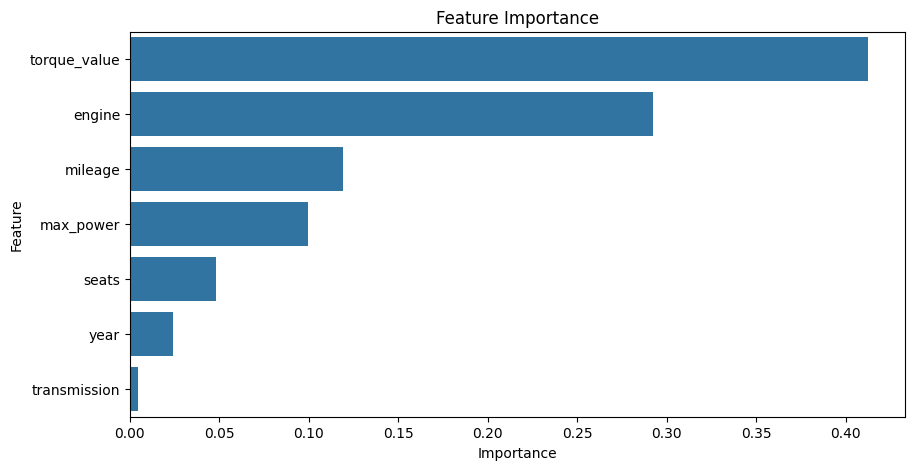

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(importance_df)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()
